<a href="https://colab.research.google.com/github/networked-intelligence-lab/QM-MVP/blob/main/notebooks/pipelines/gameemo_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NI Lab Repository
This notebook was used for exploratory purposes, and is saved as a Colab notebook in https://github.com/networked-intelligence-lab/QM-MVP under:
```
notebooks/pipelines/gameemo_pipeline.ipynb
```

---

## Source
### Dataset
Dataset is sourced from the Biomedical Signal Processing and Control Paper titled "**Database for an emotion recognition system based on EEG signals and various computer games–GAMEEMO**"

*Citation*: Alakus, T. B., Gonen, M., & Turkoglu, I. (2020). Database for an emotion recognition system based on EEG signals and various computer games–GAMEEMO. Biomedical Signal Processing and Control, 60, 101951.

*Kaggle Source*: https://www.kaggle.com/datasets/sigfest/database-for-emotion-recognition-system-gameemo

In [3]:
%%sh
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/kaggle.json
chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
%%sh
kaggle datasets download sigfest/database-for-emotion-recognition-system-gameemo

100%|██████████| 1.70G/1.70G [00:27<00:00, 66.4MB/s]


In [7]:
%%sh
unzip /content/database-for-emotion-recognition-system-gameemo.zip

Archive:  /content/database-for-emotion-recognition-system-gameemo.zip
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G1AllChannels.csv  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G2AllChannels.csv  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G3AllChannels.csv  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G4AllChannels.csv  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.mat format/S01G1AllChannels.mat  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.mat format/S01G2AllChannels.mat  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.mat format/S01G3AllChannels.mat  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.mat format/S01G4AllChannels.mat  
  inflating: GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G1AllRawChannels.csv  
  inflating: GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G2AllRawChannels.csv  
  inflating: GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G3AllRawChannels.csv  
  inflating: GAMEEMO/(S

In [34]:
import os
from glob import glob
import shutil
import pathlib
import numpy as np
import pandas as pd
from pdf2image import convert_from_path
from PIL import Image

In [8]:
os.makedirs("data")

In [14]:
for fileref in pathlib.Path('GAMEEMO/').glob('**/*.csv'):
  fn = str(fileref)
  bn = os.path.basename(fn)
  shutil.copy(fn, f"data/{bn}")

In [31]:
_set = set()

X = []
X_fns = []
for data_fn in glob("data/*AllChannels.csv"):
  X_fn = os.path.basename(data_fn).split("All")[0]
  data_df = pd.read_csv(data_fn)
  data_df = data_df[[c for c in data_df.columns if "unnamed" not in c.lower()]]
  data_np = np.array(data_df).T
  X.append(data_np)
  X_fns.append(X_fn)

In [32]:
X = np.array(X)

In [33]:
print(X.shape)

(112, 14, 38252)


In [36]:
print(sorted(X_fns))

['S01G1', 'S01G2', 'S01G3', 'S01G4', 'S02G1', 'S02G2', 'S02G3', 'S02G4', 'S03G1', 'S03G2', 'S03G3', 'S03G4', 'S04G1', 'S04G2', 'S04G3', 'S04G4', 'S05G1', 'S05G2', 'S05G3', 'S05G4', 'S06G1', 'S06G2', 'S06G3', 'S06G4', 'S07G1', 'S07G2', 'S07G3', 'S07G4', 'S08G1', 'S08G2', 'S08G3', 'S08G4', 'S09G1', 'S09G2', 'S09G3', 'S09G4', 'S10G1', 'S10G2', 'S10G3', 'S10G4', 'S11G1', 'S11G2', 'S11G3', 'S11G4', 'S12G1', 'S12G2', 'S12G3', 'S12G4', 'S13G1', 'S13G2', 'S13G3', 'S13G4', 'S14G1', 'S14G2', 'S14G3', 'S14G4', 'S15G1', 'S15G2', 'S15G3', 'S15G4', 'S16G1', 'S16G2', 'S16G3', 'S16G4', 'S17G1', 'S17G2', 'S17G3', 'S17G4', 'S18G1', 'S18G2', 'S18G3', 'S18G4', 'S19G1', 'S19G2', 'S19G3', 'S19G4', 'S20G1', 'S20G2', 'S20G3', 'S20G4', 'S21G1', 'S21G2', 'S21G3', 'S21G4', 'S22G1', 'S22G2', 'S22G3', 'S22G4', 'S23G1', 'S23G2', 'S23G3', 'S23G4', 'S24G1', 'S24G2', 'S24G3', 'S24G4', 'S25G1', 'S25G2', 'S25G3', 'S25G4', 'S26G1', 'S26G2', 'S26G3', 'S26G4', 'S27G1', 'S27G2', 'S27G3', 'S27G4', 'S28G1', 'S28G2', 'S28G3', 

In [37]:
%%sh
pip install pdf2image

In [42]:
%%sh
apt-get install poppler-utils

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (235 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [77]:
pdfs = sorted(glob("GAMEEMO/**/*.pdf", recursive=True)) # The following cells is to circumvent input() after display() bugs

In [78]:
count = 0
labels_dict = {}

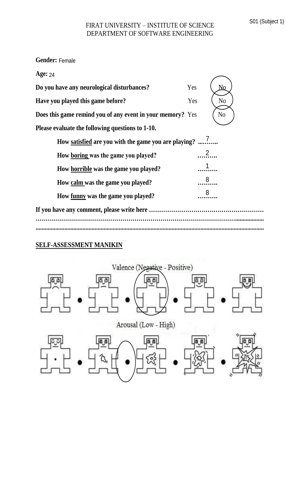

In [81]:
pdf_fn = pdfs[count]
label_key = pdf_fn
for rem_text in ["GAMEEMO/(", ")/SAM Ratings/", ".pdf"]:
  label_key = label_key.replace(rem_text, '')
images = convert_from_path(pdf_fn)
im = images[0].resize((300, 500))
display(im)

In [82]:
user_input = input()
labels_dict[label_key] = user_input
count += 1

7 2 1 8 8 3 2.5


In [83]:
print(labels_dict)

{'S01G1': '2 8 1 3 2 1.5 2', 'S01G2': '7 2 1 8 8 3 2.5'}
